In [1]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans

from plot import plot_two_figures
from tools import get_number_components, extract_features, remove_unclassified

# Loading data & Pre-processing

Loading Indiana and Salinas images and their ground truth

In [2]:
indiana_img = np.load('../data/indianapines.npy')
indiana_labels = np.load('../data/indianapines_gt.npy')
salinas_img = np.load('../data/salinas.npy')
salinas_labels = np.load('../data/salinas_gt.npy')

In [3]:
# normalize radiance values to get reflectance values
indiana_img = indiana_img / indiana_img.max()
salinas_img = salinas_img / salinas_img.max()

In [4]:
print("Indiana shape: {}".format(indiana_img.shape))
print("Salinas shape: {}".format(salinas_img.shape))

Indiana shape: (145, 145, 200)
Salinas shape: (512, 217, 204)


In [5]:
# Reshaping the HSI as a 2D matrix
X_indiana = indiana_img.reshape((-1, indiana_img.shape[-1]))
print("Indiana shape: {}".format(X_indiana.shape))

X_salinas = salinas_img.reshape((-1, salinas_img.shape[-1]))
print("Salinas shape: {}".format(X_salinas.shape))

Indiana shape: (21025, 200)
Salinas shape: (111104, 204)


In [6]:
n_cluster_indiana = len(np.unique(indiana_labels)) - 1
n_cluster_salinas = len(np.unique(salinas_labels)) - 1

In [7]:
print("Number of labels Indiana: {}".format(n_cluster_indiana))
print("Number of labels Salinas: {}".format(n_cluster_salinas))

Number of labels Indiana: 16
Number of labels Salinas: 16


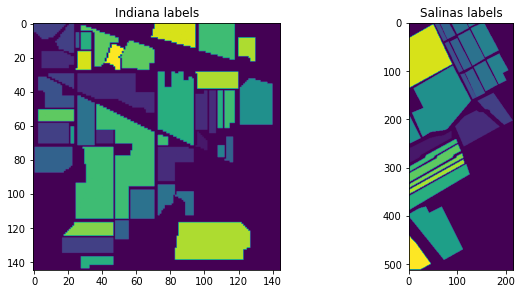

In [8]:
# Display ground truth for each image
plot_two_figures(indiana_labels, salinas_labels, title_fig1='Indiana labels', title_fig2='Salinas labels')

## PCA

PCA stands for principal component analysis. PCA is an unsupervised technique used for reduce the dimensions of the dataset. It transforms the dataset reducing the number of components in order to decrease the computational complexity of the model. 

To reduce the number of component, the PCA computes a linear transformation performing a linear mapping of the data to a lower-dimensional space. It aims to reduce the dimensions with a maximized variance of the data.

In [9]:
n_components_indiana = get_number_components(X_indiana)
n_components_salinas = get_number_components(X_salinas)

Fitting the PCA
Fitting the PCA


In [10]:
print("Number of components Indiana: {}".format(n_components_indiana))
print("Number of components Salinas: {}".format(n_components_salinas))

Number of components Indiana: 69
Number of components Salinas: 6


After retrieving the optimal number of components for each image, we need to compute a second PCA for each image to extract their features.

In [11]:
X_indiana_reduced = extract_features(X_indiana, n_components_indiana)
X_salinas_reduced = extract_features(X_salinas, n_components_salinas)

In [12]:
print("Indiana reduced data shape: {}".format(X_indiana_reduced.shape))
print("Salinas reduced data shape: {}".format(X_salinas_reduced.shape))

Indiana reduced data shape: (21025, 69)
Salinas reduced data shape: (111104, 6)


# Unsupervised models

## KMeans

KMeans is an unsupervised clustering algorithm that attempts to partition the dataset into a specified number of clusters. At the beginning, the algorithm randomly selects centroids for each cluster and performs iterative calculations to optimize the positions of the centroids. The algorithm stops when the centroids have been stabilized.

In [13]:
indiana_model_kmeans = KMeans(n_clusters=n_cluster_indiana, verbose=1)
salinas_model_kmeans = KMeans(n_clusters=n_cluster_salinas, verbose=1)

In [14]:
indiana_model_kmeans.fit(X_indiana_reduced)

Initialization complete
Iteration 0, inertia 1435.6859597692821
Iteration 1, inertia 982.9298759439729
Iteration 2, inertia 962.8876073140143
Iteration 3, inertia 948.7827760807291
Iteration 4, inertia 939.3838762642397
Iteration 5, inertia 933.7488523702375
Iteration 6, inertia 929.6986110791375
Iteration 7, inertia 926.4310338179013
Iteration 8, inertia 923.8890377451705
Iteration 9, inertia 922.2658365780471
Iteration 10, inertia 921.2218140499766
Iteration 11, inertia 920.367711280879
Iteration 12, inertia 919.6027745341488
Iteration 13, inertia 918.9225083963057
Iteration 14, inertia 918.3856176554465
Iteration 15, inertia 917.9528407869751
Iteration 16, inertia 917.5736661379827
Iteration 17, inertia 917.3276230883594
Iteration 18, inertia 917.1037903122376
Iteration 19, inertia 916.8405271759627
Iteration 20, inertia 916.5964172921606
Iteration 21, inertia 916.3349555701293
Iteration 22, inertia 916.0087534888925
Iteration 23, inertia 915.6620549059094
Iteration 24, inertia 915.

Iteration 57, inertia 919.7173963245226
Iteration 58, inertia 919.6918605236419
Iteration 59, inertia 919.6776905228395
Iteration 60, inertia 919.6702848216752
Iteration 61, inertia 919.6676843472038
Iteration 62, inertia 919.6651283010004
Converged at iteration 62: center shift 5.103789213066708e-07 within tolerance 6.1411125329096e-07.
Initialization complete
Iteration 0, inertia 1395.744395664565
Iteration 1, inertia 999.1535839305739
Iteration 2, inertia 980.5286456480873
Iteration 3, inertia 969.2535771727486
Iteration 4, inertia 960.1544280532847
Iteration 5, inertia 953.8810448127532
Iteration 6, inertia 949.4715398780153
Iteration 7, inertia 946.422401812085
Iteration 8, inertia 944.2549051720125
Iteration 9, inertia 942.4919015177578
Iteration 10, inertia 941.2716749693608
Iteration 11, inertia 940.3644355493086
Iteration 12, inertia 939.6903098982527
Iteration 13, inertia 939.2048412707741
Iteration 14, inertia 938.8572004198824
Iteration 15, inertia 938.5102672228458
Iterati

Iteration 23, inertia 913.3121745561544
Iteration 24, inertia 913.168603123198
Iteration 25, inertia 913.0611966581015
Iteration 26, inertia 912.9953302585078
Iteration 27, inertia 912.9416208797315
Iteration 28, inertia 912.8840817014814
Iteration 29, inertia 912.8239669508652
Iteration 30, inertia 912.7759213701651
Iteration 31, inertia 912.7442141298366
Iteration 32, inertia 912.7277807492567
Iteration 33, inertia 912.7174711310095
Iteration 34, inertia 912.7082519448827
Iteration 35, inertia 912.6982395351084
Iteration 36, inertia 912.6888117295687
Iteration 37, inertia 912.682910499755
Iteration 38, inertia 912.6714912797631
Iteration 39, inertia 912.6570692200421
Iteration 40, inertia 912.6442520997983
Iteration 41, inertia 912.6396710909858
Iteration 42, inertia 912.6384853486128
Converged at iteration 42: center shift 4.940028967328839e-07 within tolerance 6.1411125329096e-07.
Initialization complete
Iteration 0, inertia 1392.7914295814462
Iteration 1, inertia 987.0067543512719

KMeans(n_clusters=16, verbose=1)

In [15]:
salinas_model_kmeans.fit(X_salinas_reduced)

Initialization complete
Iteration 0, inertia 3225.491654324833
Iteration 1, inertia 2677.117496751281
Iteration 2, inertia 2641.010063488433
Iteration 3, inertia 2630.4037214686828
Iteration 4, inertia 2623.859518236271
Iteration 5, inertia 2618.5190964637864
Iteration 6, inertia 2613.833286699806
Iteration 7, inertia 2610.059885249555
Iteration 8, inertia 2607.107954023582
Iteration 9, inertia 2604.95510496827
Iteration 10, inertia 2603.177459478842
Iteration 11, inertia 2601.550675341825
Iteration 12, inertia 2599.8838635368174
Iteration 13, inertia 2598.0759798183776
Iteration 14, inertia 2595.947145732974
Iteration 15, inertia 2593.5525184917233
Iteration 16, inertia 2590.9478830045005
Iteration 17, inertia 2588.171203501259
Iteration 18, inertia 2585.226824529087
Iteration 19, inertia 2581.6760824354715
Iteration 20, inertia 2577.432628220171
Iteration 21, inertia 2572.9765717605374
Iteration 22, inertia 2569.1920995361397
Iteration 23, inertia 2566.071115945772
Iteration 24, iner

Iteration 22, inertia 2585.853715185945
Iteration 23, inertia 2584.513746143689
Iteration 24, inertia 2582.843532889963
Iteration 25, inertia 2581.1251314613755
Iteration 26, inertia 2579.3463471809305
Iteration 27, inertia 2576.7986329400082
Iteration 28, inertia 2573.4572371384957
Iteration 29, inertia 2570.017176469967
Iteration 30, inertia 2566.8696772025764
Iteration 31, inertia 2564.272431786911
Iteration 32, inertia 2561.8472491776756
Iteration 33, inertia 2559.515635784606
Iteration 34, inertia 2556.9910877151365
Iteration 35, inertia 2553.954525090177
Iteration 36, inertia 2551.713211627427
Iteration 37, inertia 2550.272759064731
Iteration 38, inertia 2549.151903902949
Iteration 39, inertia 2547.9204520680937
Iteration 40, inertia 2546.9210103071746
Iteration 41, inertia 2546.033059436702
Iteration 42, inertia 2545.342317751448
Iteration 43, inertia 2544.538932237753
Iteration 44, inertia 2543.9685257686288
Iteration 45, inertia 2543.3936699387295
Iteration 46, inertia 2542.83

KMeans(n_clusters=16, verbose=1)

In [16]:
indiana_preds_kmeans = indiana_model_kmeans.labels_.reshape((indiana_img.shape[0], indiana_img.shape[1]))
salinas_preds_kmeans = salinas_model_kmeans.labels_.reshape((salinas_img.shape[0], salinas_img.shape[1]))

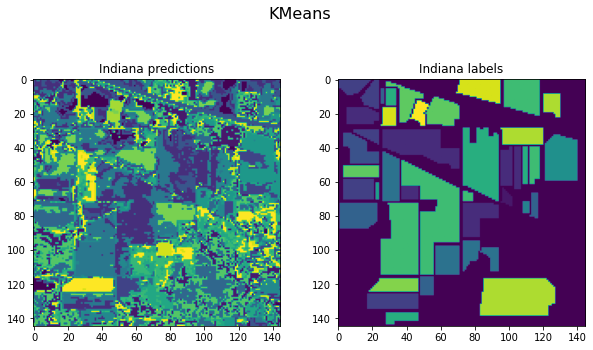

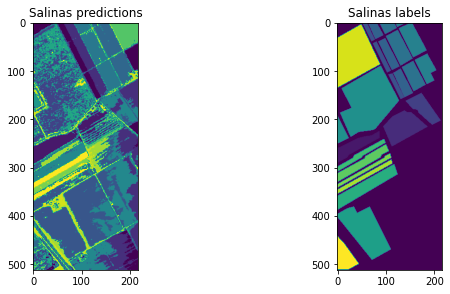

In [17]:
plot_two_figures(indiana_preds_kmeans, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='KMeans')
plot_two_figures(salinas_preds_kmeans, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

As we can see, our model is able to classify some data but we cannot clearly distinguish the classes. For example, on the lower part of the image of the salinas predictions, we can assume that most of the data belongs to the same class but with the ground truth image, the lower right part of the image does not belong to no class.

We will remove some unclassified data in order to easily distinguish what our model recognized.

In [18]:
indiana_preds_kmeans_corrected = remove_unclassified(indiana_preds_kmeans, indiana_labels)
salinas_preds_kmeans_corrected = remove_unclassified(salinas_preds_kmeans, salinas_labels)

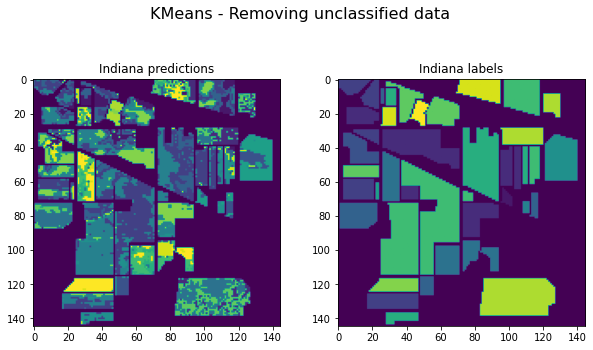

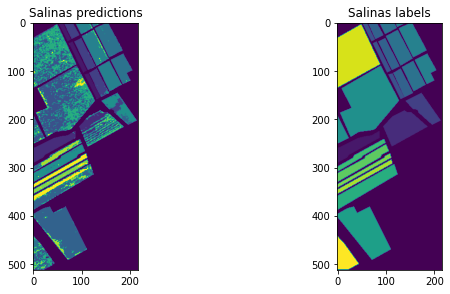

In [19]:
plot_two_figures(indiana_preds_kmeans_corrected, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='KMeans - Removing unclassified data')
plot_two_figures(salinas_preds_kmeans_corrected, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

We can now distinguish the classes more easily. Our predictions on the salinas image seem correct except for the upper left part.
On Indiana image, it is still difficult to distinguish the classes. For example, our model is not able to recognize the block at the bottom right of the image.

## Mini Batch KMeans

Mini Batch KMeans is a variant of the KMeans algorithm that converges faster. The main difference between those algorithms is that Mini Batch KMeans uses small batches to reduce the computation time. For each interation, a new random samples from the dataset is obtained and used to update the clusters. 

In [20]:
indiana_model_mini = MiniBatchKMeans(n_clusters=n_cluster_indiana, verbose=1)
salinas_model_mini = MiniBatchKMeans(n_clusters=n_cluster_salinas, verbose=1)

In [21]:
indiana_model_mini.fit(X_indiana_reduced)

Init 1/3 with method: k-means++
Inertia for init 1/3: 14.470321
Init 2/3 with method: k-means++
Inertia for init 2/3: 12.772480
Init 3/3 with method: k-means++
Inertia for init 3/3: 12.748863
Minibatch iteration 1/21100: mean batch inertia: 0.074281, ewa inertia: 0.074281 
Minibatch iteration 2/21100: mean batch inertia: 0.043358, ewa inertia: 0.073987 
Minibatch iteration 3/21100: mean batch inertia: 0.041026, ewa inertia: 0.073673 
Minibatch iteration 4/21100: mean batch inertia: 0.051241, ewa inertia: 0.073460 
Minibatch iteration 5/21100: mean batch inertia: 0.043974, ewa inertia: 0.073180 
Minibatch iteration 6/21100: mean batch inertia: 0.050383, ewa inertia: 0.072963 
Minibatch iteration 7/21100: mean batch inertia: 0.045270, ewa inertia: 0.072699 
Minibatch iteration 8/21100: mean batch inertia: 0.040671, ewa inertia: 0.072395 
Minibatch iteration 9/21100: mean batch inertia: 0.053701, ewa inertia: 0.072217 
Minibatch iteration 10/21100: mean batch inertia: 0.040791, ewa inerti

MiniBatchKMeans(n_clusters=16, verbose=1)

In [22]:
salinas_model_mini.fit(X_salinas_reduced)

Init 1/3 with method: k-means++
Inertia for init 1/3: 5.712305
Init 2/3 with method: k-means++
Inertia for init 2/3: 7.951630
Init 3/3 with method: k-means++
Inertia for init 3/3: 6.437791
Minibatch iteration 1/111200: mean batch inertia: 0.034467, ewa inertia: 0.034467 
Minibatch iteration 2/111200: mean batch inertia: 0.029682, ewa inertia: 0.034458 
Minibatch iteration 3/111200: mean batch inertia: 0.019348, ewa inertia: 0.034431 
Minibatch iteration 4/111200: mean batch inertia: 0.020810, ewa inertia: 0.034406 
Minibatch iteration 5/111200: mean batch inertia: 0.021192, ewa inertia: 0.034382 
Minibatch iteration 6/111200: mean batch inertia: 0.026047, ewa inertia: 0.034367 
Minibatch iteration 7/111200: mean batch inertia: 0.019662, ewa inertia: 0.034341 
Minibatch iteration 8/111200: mean batch inertia: 0.020245, ewa inertia: 0.034316 
Minibatch iteration 9/111200: mean batch inertia: 0.019642, ewa inertia: 0.034289 
Minibatch iteration 10/111200: mean batch inertia: 0.027389, ewa

Minibatch iteration 305/111200: mean batch inertia: 0.025415, ewa inertia: 0.029821 
Minibatch iteration 306/111200: mean batch inertia: 0.020027, ewa inertia: 0.029803 
Minibatch iteration 307/111200: mean batch inertia: 0.020359, ewa inertia: 0.029786 
Minibatch iteration 308/111200: mean batch inertia: 0.023417, ewa inertia: 0.029775 
Minibatch iteration 309/111200: mean batch inertia: 0.018840, ewa inertia: 0.029755 
Minibatch iteration 310/111200: mean batch inertia: 0.019918, ewa inertia: 0.029738 
Minibatch iteration 311/111200: mean batch inertia: 0.021294, ewa inertia: 0.029722 
Minibatch iteration 312/111200: mean batch inertia: 0.015859, ewa inertia: 0.029697 
Minibatch iteration 313/111200: mean batch inertia: 0.029151, ewa inertia: 0.029696 
Minibatch iteration 314/111200: mean batch inertia: 0.026736, ewa inertia: 0.029691 
Minibatch iteration 315/111200: mean batch inertia: 0.023105, ewa inertia: 0.029679 
Minibatch iteration 316/111200: mean batch inertia: 0.019247, ewa

MiniBatchKMeans(n_clusters=16, verbose=1)

In [23]:
indiana_preds_mini = indiana_model_mini.labels_.reshape((indiana_img.shape[0], indiana_img.shape[1]))
salinas_preds_mini = salinas_model_mini.labels_.reshape((salinas_img.shape[0], salinas_img.shape[1]))

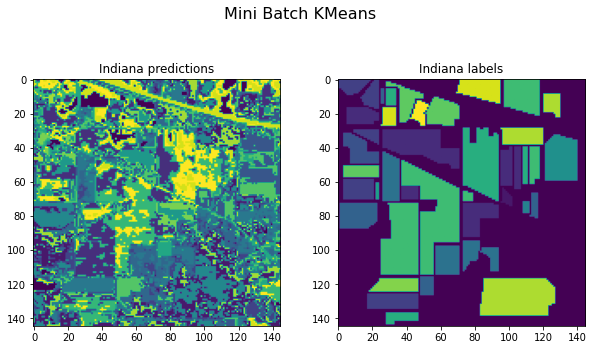

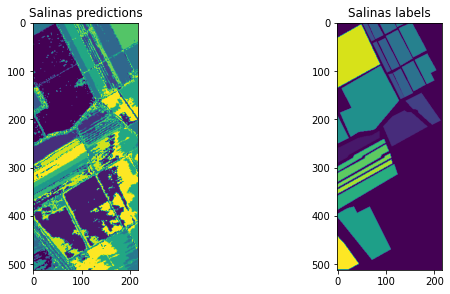

In [24]:
plot_two_figures(indiana_preds_mini, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='Mini Batch KMeans')
plot_two_figures(salinas_preds_mini, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

In [25]:
indiana_preds_mini_corrected = remove_unclassified(indiana_preds_mini, indiana_labels)
salinas_preds_mini_corrected = remove_unclassified(salinas_preds_mini, salinas_labels)

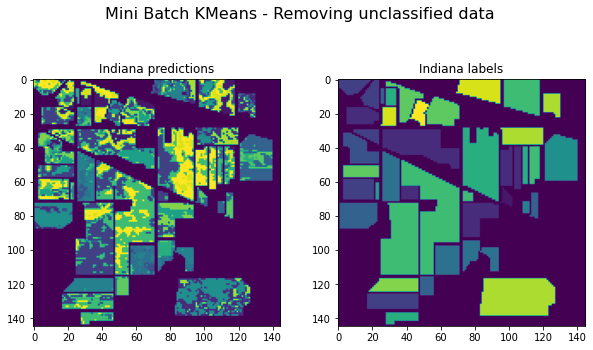

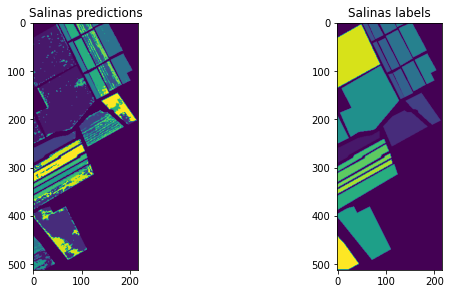

In [26]:
plot_two_figures(indiana_preds_mini_corrected, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='Mini Batch KMeans - Removing unclassified data')
plot_two_figures(salinas_preds_mini_corrected, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

It seems that it is still difficult to clearly distinguish the classes on the two images. 
We do not see any improvement on the upper left part of the predictions on salinas image and on the indiana image.

## Save predictions

In order to be able to compare these two models with the others, we save our prediction data on each image.

In [27]:
np.save('../data/predictions/indiana_preds_kmeans.npy', indiana_preds_kmeans_corrected)
np.save('../data/predictions/salinas_preds_kmeans.npy', salinas_preds_kmeans_corrected)

In [28]:
np.save('../data/predictions/indiana_preds_minibatch.npy', indiana_preds_mini_corrected)
np.save('../data/predictions/salinas_preds_minibatch.npy', salinas_preds_mini_corrected)